In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data.csv", delimiter=";", dtype={"time": float})

In [4]:
df

,threads,size,time
0,1,500,0.50
1,1,1000,3.13
2,1,1500,13.24
3,2,500,0.31
4,2,1000,1.56
5,2,1500,8.71
6,4,500,0.19
7,4,1000,0.85
8,4,1500,4.12
9,8,500,0.12


In [5]:
df["time"][0]

0.5

In [6]:
df["speedup"] = 0.0
for i in range(len(df)):
    if df["size"][i] == 500:
        df["speedup"][i] = df["time"][0] / df["time"][i]
    elif df["size"][i] == 1000:
        df["speedup"][i] = df["time"][1] / df["time"][i]
    elif df["size"][i] == 1500:
        df["speedup"][i] = df["time"][2] / df["time"][i]

In [98]:
df["speedup1"] = 0.0
for i in range(len(df)):
    if df["size"][i] == 500:
        df["speedup1"][i] = df["time"][i] / df["time"][0]
    elif df["size"][i] == 1000:
        df["speedup1"][i] = df["time"][i] / df["time"][1]
    elif df["size"][i] == 1500:
        df["speedup1"][i] = df["time"][i] / df["time"][2]

In [7]:
df.loc[df["size"] == 500]["speedup"]

0     1.000000
3     1.612903
6     2.631579
9     4.166667
12    6.250000
Name: speedup, dtype: float64

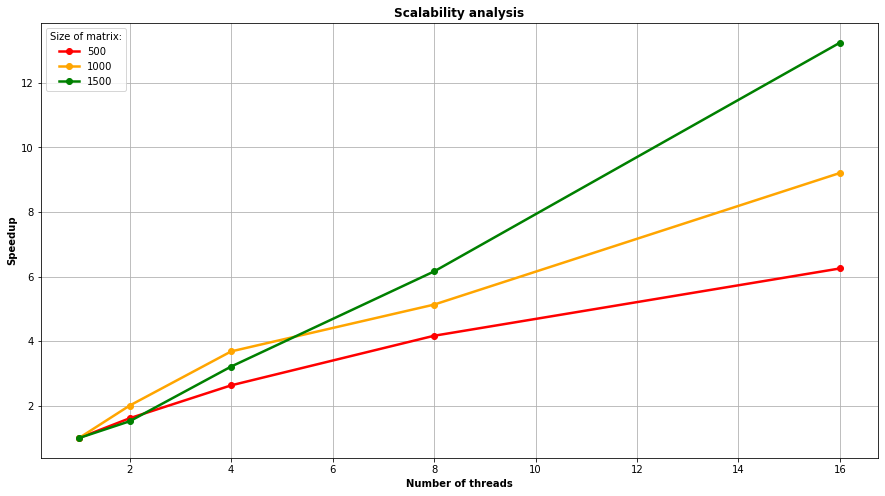

In [16]:
plt.figure(figsize=(15, 8))
plt.title("Scalability analysis").set_weight("bold")
plt.plot(df.loc[df["size"] == 500]["threads"], df.loc[df["size"] == 500]["speedup"], c="red", marker="o", linewidth=2.5)
plt.plot(df.loc[df["size"] == 1000]["threads"], df.loc[df["size"] == 1000]["speedup"], c="orange", marker="o", linewidth=2.5)
plt.plot(df.loc[df["size"] == 1500]["threads"], df.loc[df["size"] == 1500]["speedup"], c="green", marker="o", linewidth=2.5)
plt.legend(df["size"], title="Size of matrix:")
plt.xlabel("Number of threads").set_weight("bold")
plt.ylabel("Speedup").set_weight("bold")
plt.grid(True)
plt.savefig("graph1.png")
plt.show()

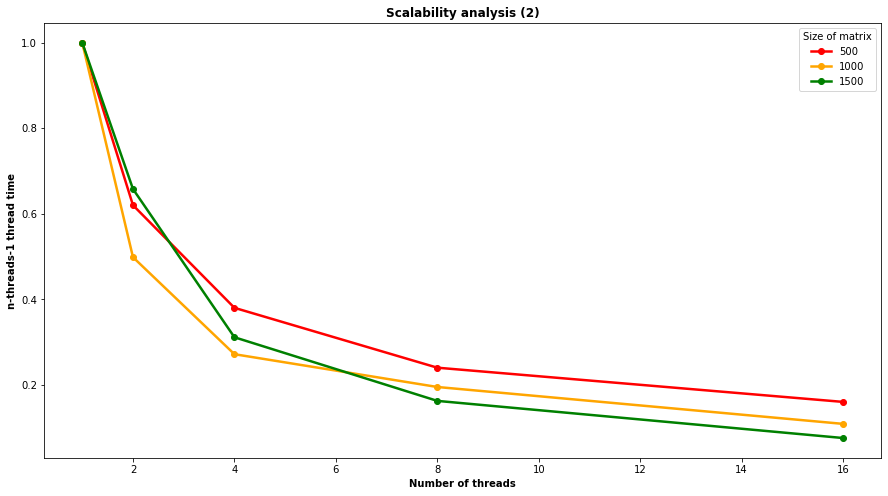

In [105]:
plt.figure(figsize=(15, 8))
plt.title("Scalability analysis (2)").set_weight("bold")
plt.plot(df.loc[df["size"] == 500]["threads"], df.loc[df["size"] == 500]["speedup1"], c="red", marker="o", linewidth=2.5)
plt.plot(df.loc[df["size"] == 1000]["threads"], df.loc[df["size"] == 1000]["speedup1"], c="orange", marker="o", linewidth=2.5)
plt.plot(df.loc[df["size"] == 1500]["threads"], df.loc[df["size"] == 1500]["speedup1"], c="green", marker="o", linewidth=2.5)
plt.legend(df["size"], title="Size of matrix")
plt.xlabel("Number of threads").set_weight("bold")
plt.ylabel("n-threads-1 thread time").set_weight("bold")
plt.grid(True)
plt.savefig("graph2.png")
plt.show()